In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gambar.jpg to gambar.jpg


(np.float64(-0.5), np.float64(735.5), np.float64(1307.5), np.float64(-0.5))

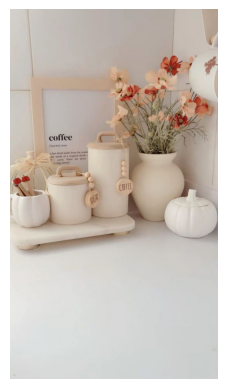

In [ ]:
image = cv2.imread("gambar.jpg")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [ ]:
def analyze_color_model_suitability(image, application):

    results = {}

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if application == 'skin_detection':
        skin_mask = cv2.inRange(ycrcb, (0,133,77), (255,173,127))
        skin_ratio = np.sum(skin_mask > 0) / skin_mask.size

        results['best_model'] = 'YCrCb'
        results['analysis'] = f'Rasio area kulit: {skin_ratio:.4f}'

    elif application == 'shadow_removal':
        v_channel = hsv[:,:,2]
        brightness_std = np.std(v_channel)

        results['best_model'] = 'HSV'
        results['analysis'] = f'Variasi brightness: {brightness_std:.2f}'

    elif application == 'text_extraction':
        contrast = np.std(gray)

        results['best_model'] = 'Grayscale'
        results['analysis'] = f'Tingkat kontras: {contrast:.2f}'

    elif application == 'object_detection':
        a_channel = lab[:,:,1]
        b_channel = lab[:,:,2]
        color_variation = np.std(a_channel) + np.std(b_channel)

        results['best_model'] = 'LAB'
        results['analysis'] = f'Variasi warna: {color_variation:.2f}'

    return results

In [ ]:
result = analyze_color_model_suitability(image, 'object_detection')
print(result)

{'best_model': 'LAB', 'analysis': 'Variasi warna: 11.36'}


In [ ]:
def simulate_image_aliasing(image, downsampling_factors):

    for factor in downsampling_factors:

        downsampled = image[::factor, ::factor]
        upsampled = cv2.resize(downsampled,
                               (image.shape[1], image.shape[0]),
                               interpolation=cv2.INTER_NEAREST)

        blurred = cv2.GaussianBlur(image, (5,5), 0)
        downsampled_blur = blurred[::factor, ::factor]
        upsampled_blur = cv2.resize(downsampled_blur,
                                    (image.shape[1], image.shape[0]),
                                    interpolation=cv2.INTER_NEAREST)

        mse_no = np.mean((image.astype("float") - upsampled.astype("float"))**2)
        mse_blur = np.mean((image.astype("float") - upsampled_blur.astype("float"))**2)

        print(f"\nFactor: {factor}")
        print(f"MSE tanpa anti-aliasing: {mse_no:.2f}")
        print(f"MSE dengan anti-aliasing: {mse_blur:.2f}")

        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1,3,2)
        plt.imshow(cv2.cvtColor(upsampled, cv2.COLOR_BGR2RGB))
        plt.title("Tanpa Anti-Aliasing")
        plt.axis("off")

        plt.subplot(1,3,3)
        plt.imshow(cv2.cvtColor(upsampled_blur, cv2.COLOR_BGR2RGB))
        plt.title("Dengan Anti-Aliasing")
        plt.axis("off")

        plt.show()


Factor: 2
MSE tanpa anti-aliasing: 26.45
MSE dengan anti-aliasing: 22.87


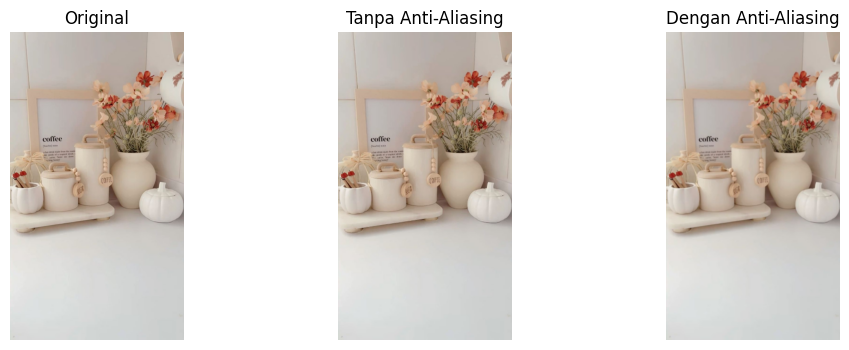


Factor: 4
MSE tanpa anti-aliasing: 90.81
MSE dengan anti-aliasing: 68.27


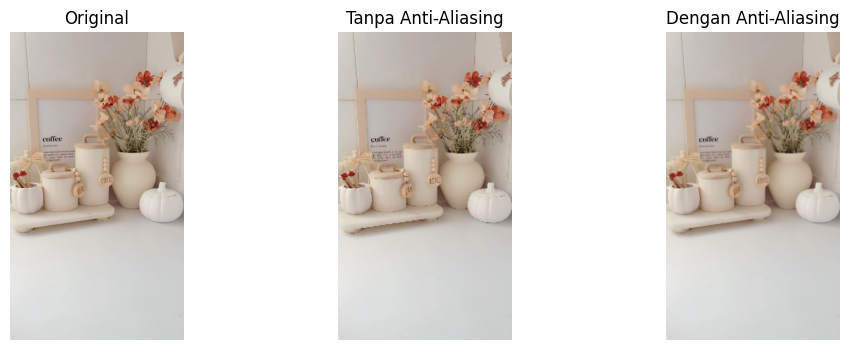


Factor: 8
MSE tanpa anti-aliasing: 166.96
MSE dengan anti-aliasing: 137.79


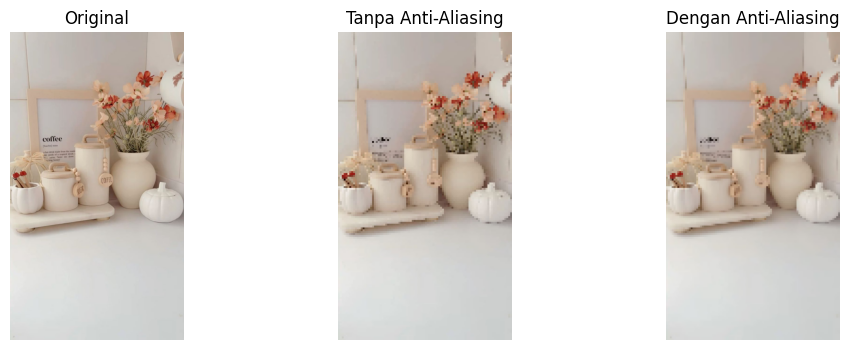

In [ ]:
simulate_image_aliasing(image, [2,4,8])